<a href="https://www.kaggle.com/code/ankitsoni0605/jrstc-eda-b5edcc?scriptVersionId=110179291" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<img src="https://i.imgur.com/Fs8LtGg.png">

In [1]:
!pip install textstat

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textstat

from wordcloud import WordCloud,STOPWORDS
from matplotlib.lines import Line2D

palette = ["#9bf6ff","#ffadad"]
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

     |████████████████████████████████| 105 kB 902 kB/s 
     |████████████████████████████████| 2.0 MB 3.8 MB/s 


In [2]:
validation_df = pd.read_csv("../input/jigsaw-toxic-severity-rating/validation_data.csv")
validation_df.head()

,worker,less_toxic,more_toxic
0,313,This article sucks \n\nwoo woo wooooooo,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...
1,188,"""And yes, people should recognize that but the...",Daphne Guinness \n\nTop of the mornin' my fav...
2,82,"Western Media?\n\nYup, because every crime in...","""Atom you don't believe actual photos of mastu..."
3,347,And you removed it! You numbskull! I don't car...,You seem to have sand in your vagina.\n\nMight...
4,539,smelly vagina \n\nBluerasberry why don't you ...,"hey \n\nway to support nazis, you racist"


In [3]:
less_toxic = pd.DataFrame()
less_toxic['text'] = validation_df['less_toxic'].tolist()
less_toxic['label'] = "Less Toxic"

more_toxic = pd.DataFrame()
more_toxic['text'] = validation_df['more_toxic'].tolist()
more_toxic['label'] = "More Toxic"

toxicity_text = pd.concat([less_toxic, more_toxic], ignore_index=True)
toxicity_text.head()

,text,label
0,This article sucks \n\nwoo woo wooooooo,Less Toxic
1,"""And yes, people should recognize that but the...",Less Toxic
2,"Western Media?\n\nYup, because every crime in...",Less Toxic
3,And you removed it! You numbskull! I don't car...,Less Toxic
4,smelly vagina \n\nBluerasberry why don't you ...,Less Toxic


In [4]:
comments_df = pd.read_csv("../input/jigsaw-toxic-severity-rating/comments_to_score.csv")
comments_df.head()

,comment_id,text
0,114890,"""\n \n\nGjalexei, you asked about whether ther..."
1,732895,"Looks like be have an abuser , can you please ..."
2,1139051,I confess to having complete (and apparently b...
3,1434512,"""\n\nFreud's ideas are certainly much discusse..."
4,2084821,It is not just you. This is a laundry list of ...


In [5]:
submission_csv = pd.read_csv("../input/jigsaw-toxic-severity-rating/sample_submission.csv")
submission_csv.head()

,comment_id,score
0,114890,0.5
1,732895,0.5
2,1139051,0.5
3,1434512,0.5
4,2084821,0.5


# Less Toxic Comments 

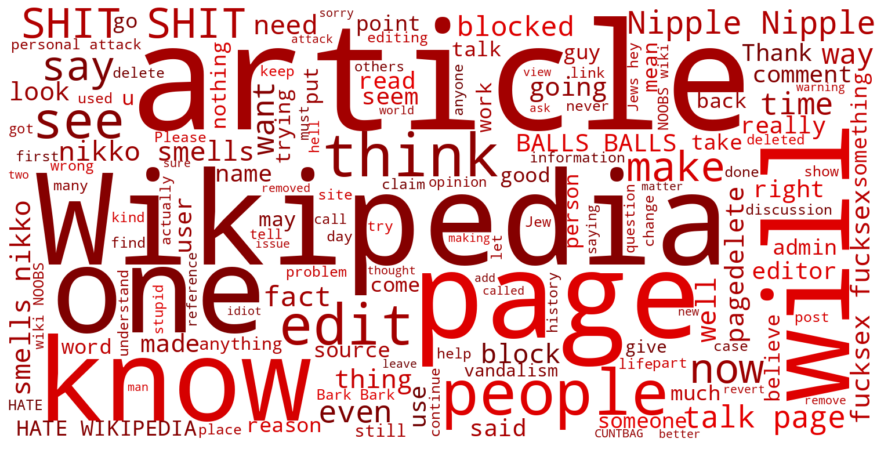

In [6]:
# color function for the wordcloud
def color_wc(word=None,font_size=None,position=None, orientation=None,font_path=None, random_state=None):
    h = int(360.0 * 255.0 / 255.0)
    s = int(190.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(40, 80)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


fig = plt.gcf()
fig.set_size_inches(16, 8)
wc = WordCloud(stopwords=STOPWORDS,background_color="white", contour_width=2, contour_color='orange',width=1500, height=750,color_func=color_wc ,max_words=150, max_font_size=256,random_state=42)
wc.generate(' '.join(less_toxic['text']))
fig = plt.imshow(wc, interpolation="bilinear")
fig = plt.axis('off')

# More Toxic Comments 

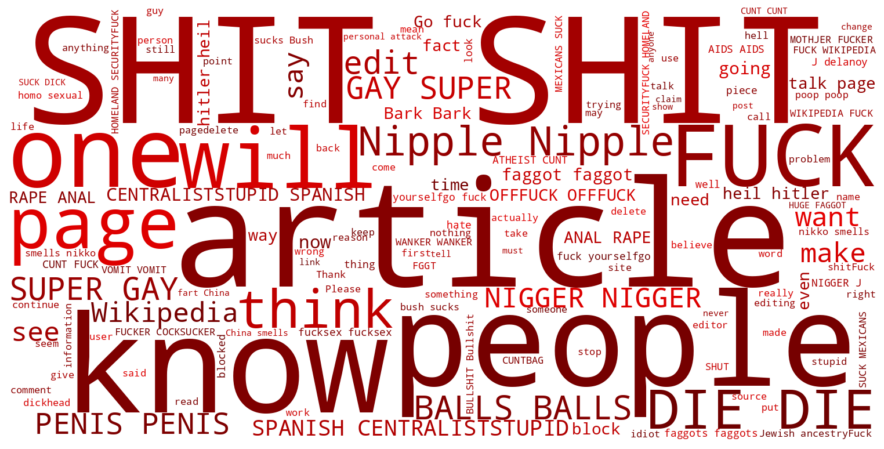

In [7]:
fig = plt.gcf()
fig.set_size_inches(16, 8)
wc = WordCloud(stopwords=STOPWORDS,background_color="white", contour_width=2, contour_color='orange',width=1500, height=750,color_func=color_wc,max_words=150, max_font_size=256,random_state=42)
wc.generate(' '.join(more_toxic['text']))
fig = plt.imshow(wc, interpolation="bilinear")
fig = plt.axis('off')

In [8]:
def avg_word_len(df):
    df = df.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
    return df

def comments_properties(df):
    text_props = pd.DataFrame()
    text_len = df['text'].str.len()
    avg_text = avg_word_len(df['text'])
    lexicon_count = []
    sentence_count = []

    for i in range(len(less_toxic)):
        lc = textstat.lexicon_count(df['text'][i])
        sc = textstat.sentence_count(df['text'][i])
        lexicon_count.append(lc)
        sentence_count.append(sc)
    
    text_props['text_len'] = text_len
    text_props['lexicon_count'] = lexicon_count
    text_props['avg_text'] = avg_text
    text_props['sentence_count'] = sentence_count
    
    return text_props

text_props_less = comments_properties(less_toxic)
text_props_more = comments_properties(more_toxic)

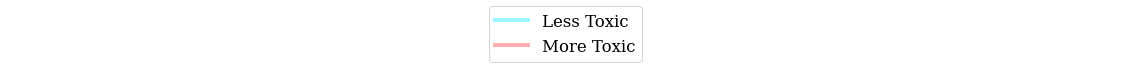

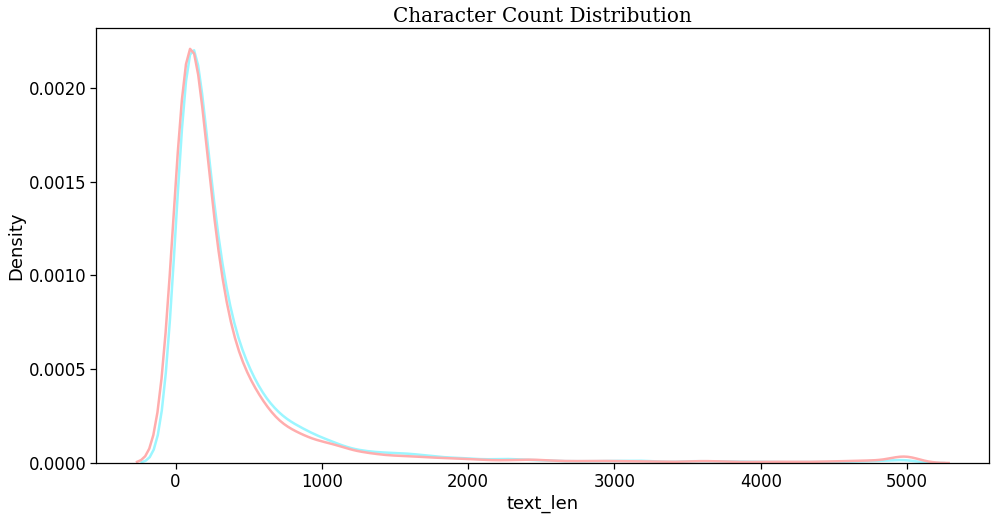

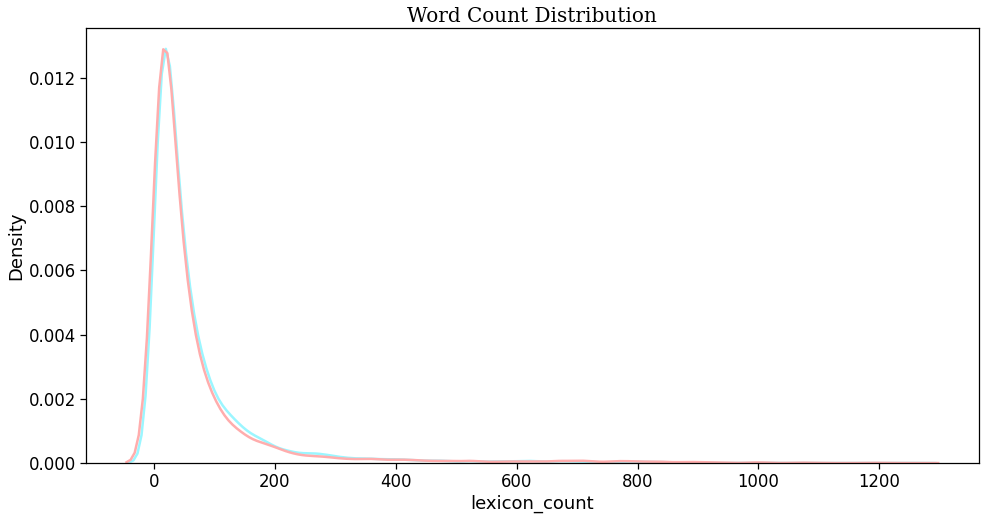

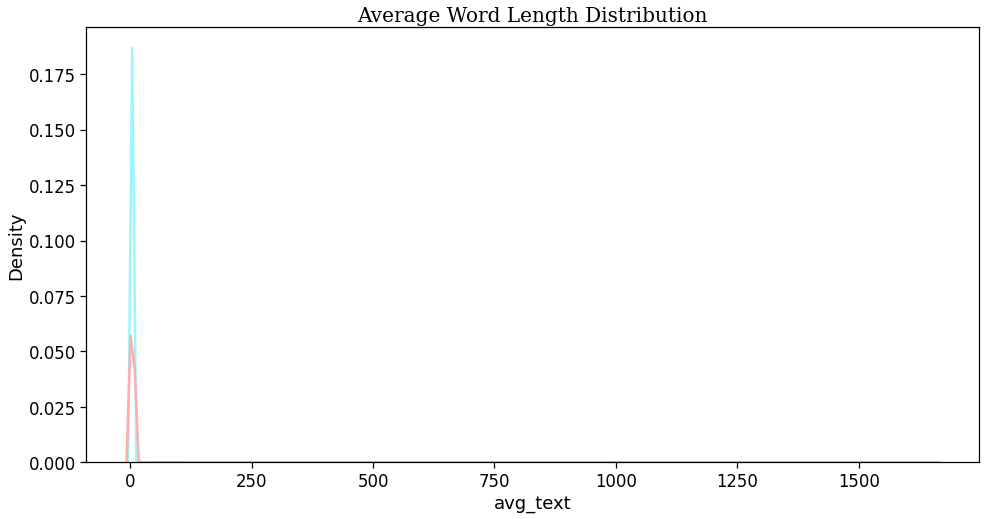

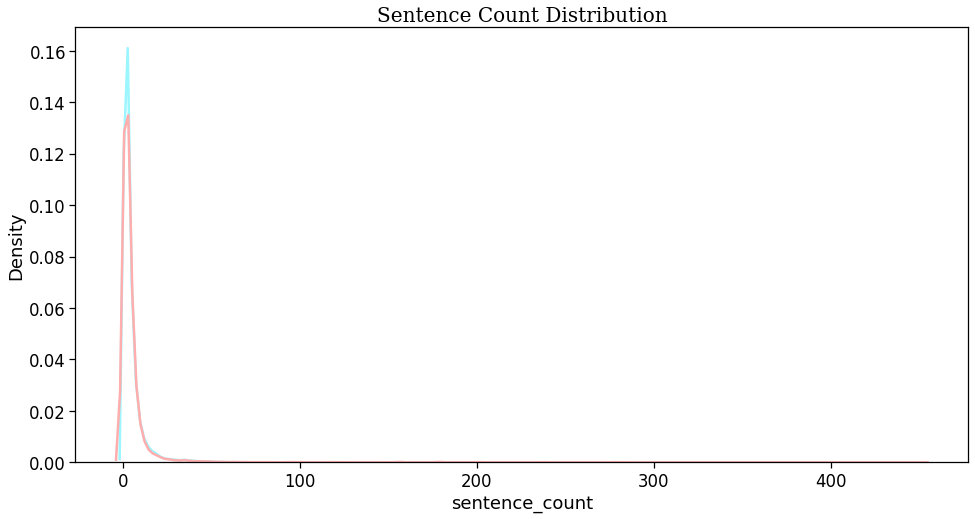

In [9]:
custom_lines = [Line2D([0], [0], color=palette[0], lw=4),
                Line2D([0], [0], color=palette[1], lw=4)]

plt.figure(figsize=(20, 1))
legend = plt.legend(custom_lines, ['Less Toxic', 'More Toxic'],loc="center")
plt.setp(legend.texts, family='Serif')
plt.axis('off')
plt.show()

def plot_distribution(col, title):
    plt.figure(figsize=(16,8))
    sns.kdeplot(data=text_props_less, x=col, color=palette[0],label="Less Toxic")
    sns.kdeplot(data=text_props_more, x=col, color=palette[1],label="More Toxic")
    plt.title(title,font="Serif", size = 20)
    plt.show()

plot_distribution("text_len", "Character Count Distribution")
plot_distribution("lexicon_count", "Word Count Distribution")
plot_distribution("avg_text", "Average Word Length Distribution")
plot_distribution("sentence_count", "Sentence Count Distribution")